# Detect the Outlier in the Machine Learning

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Machine_Learning\002_Encoding\loan.csv")
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,NaN,Y


In [6]:
 dataset.info()

#  to find the statistics Values for the numeric Data (mean, max, min, count, std).
# In this Data outlier will be present into the ApplicantIncome and CoApplicantIncome.
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      608 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


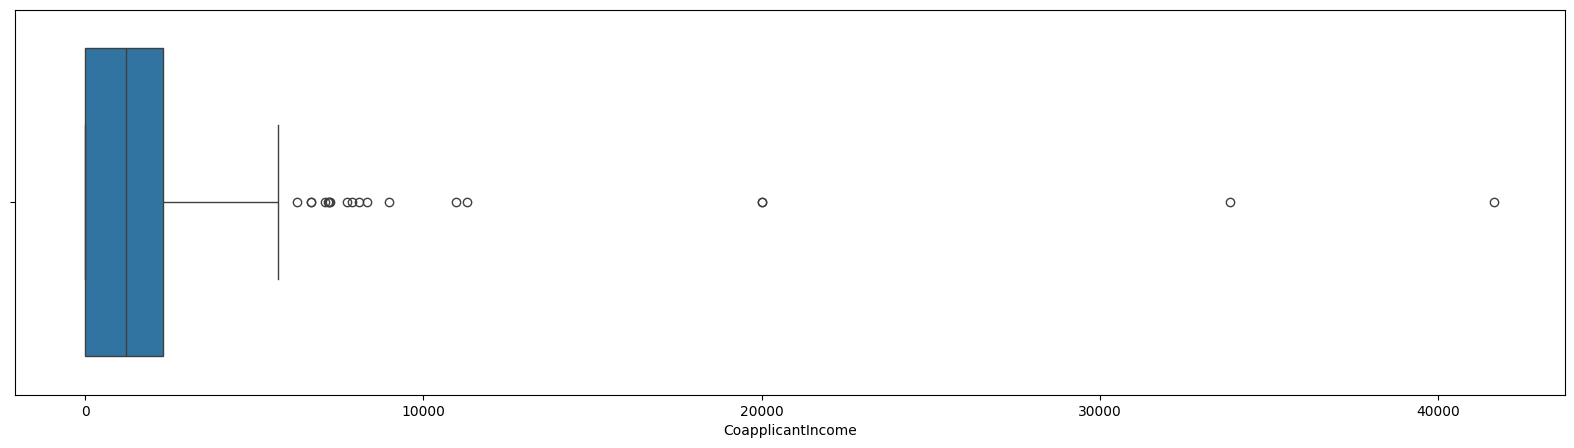

In [19]:
plt.figure(figsize=(20, 5))
sns.boxplot(x = "CoapplicantIncome", data = dataset)
# sns.boxplot(x = "ApplicantIncome", data = dataset)
# sns.boxplot(x = "LoanAmount", data = dataset)
 
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_8400\1927280878.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


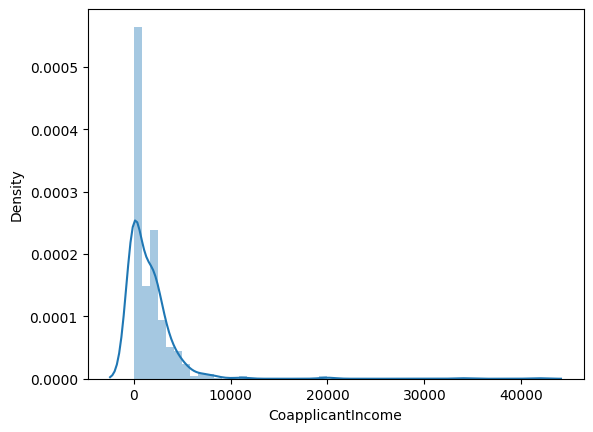

In [11]:
#  If the Tail of the distplot is lengthy then the outliers will be present
sns.distplot(dataset["CoapplicantIncome"])
plt.show()

 # Outliers Removal using the IQR method in Machine Learning

In [9]:
dataset.shape    # Check the Row and the column for the Particular Data

(614, 13)

In [14]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)

In [15]:
IQR = q3 - q1

In [20]:
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
min_range,max_range

(np.float64(-3445.875), np.float64(5743.125))

In [25]:
#  This Simple Line is Used for removed the Outliers.

new_dataset = dataset[dataset["CoapplicantIncome"] <= max_range]
new_dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [27]:
new_dataset.shape

(596, 13)

# Outliers Removal Using the Z-Score Method in Machine Learning

In [28]:
import pandas as pd

In [30]:
dataset = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\Machine_Learning\002_Encoding\loan.csv")
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,NaN,Y


In [35]:
#  Check if data contain the Null Data into the dataset.
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         6
Loan_Status           0
dtype: int64

In [37]:
#  Check the Stastical Methods for the Numeric Data.
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='CoapplicantIncome'>

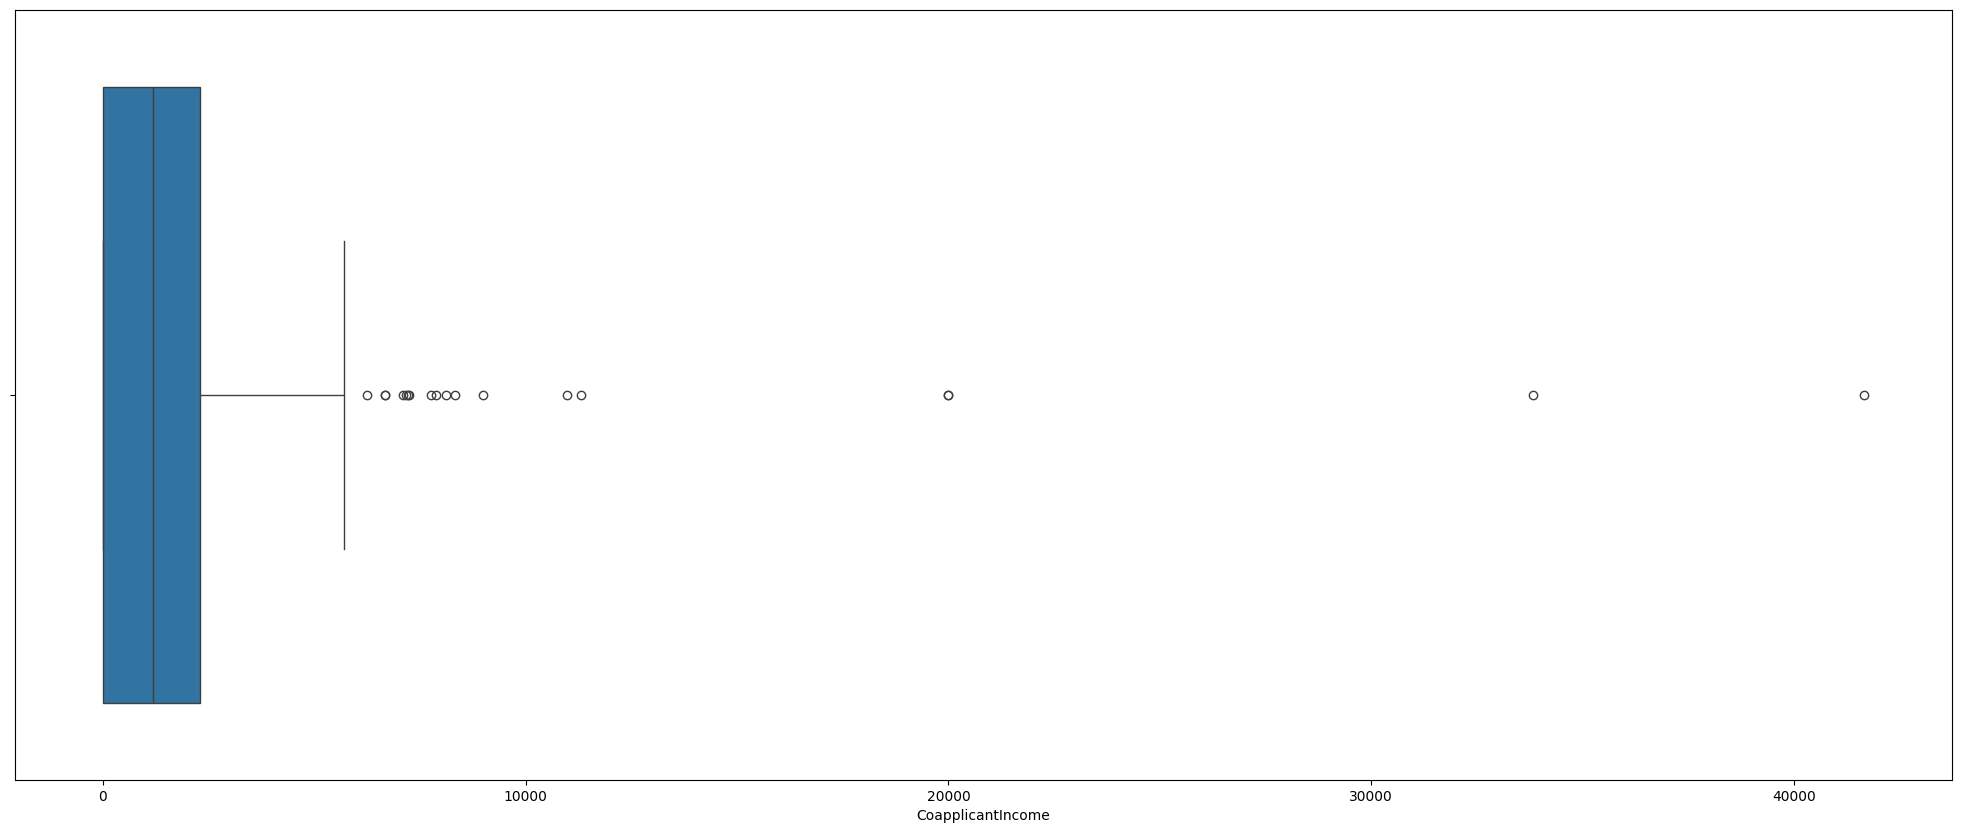

In [60]:
plt.figure(figsize= (25,10))
sns.boxplot(x = "CoapplicantIncome", data = dataset)
# sns.boxplot(x = "ApplicantIncome", data = dataset, color = "orange")

C:\Users\USER\AppData\Local\Temp\ipykernel_8400\2328021184.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

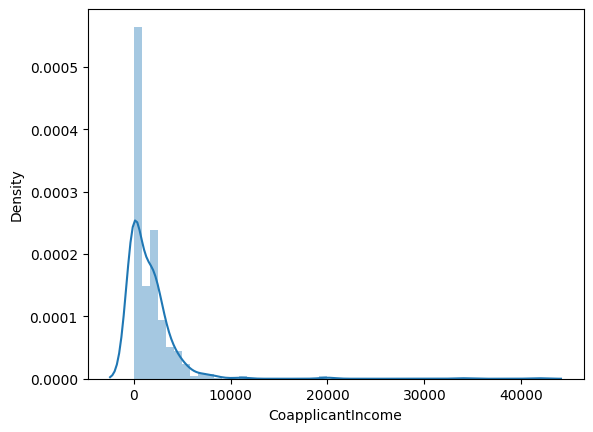

In [63]:
sns.distplot(dataset["CoapplicantIncome"])

In [66]:
#  Using the Simple Method for the Outliers.
min_range = dataset["CoapplicantIncome"].mean() - 3 * dataset["CoapplicantIncome"].std()
max_range = dataset["CoapplicantIncome"].mean() + 3 * dataset["CoapplicantIncome"].std()

min_range, max_range

(np.float64(-7157.4993096454655), np.float64(10399.990905699668))

In [70]:
new_dataset = dataset[dataset["CoapplicantIncome"] <= max_range]
new_dataset.shape

(608, 13)

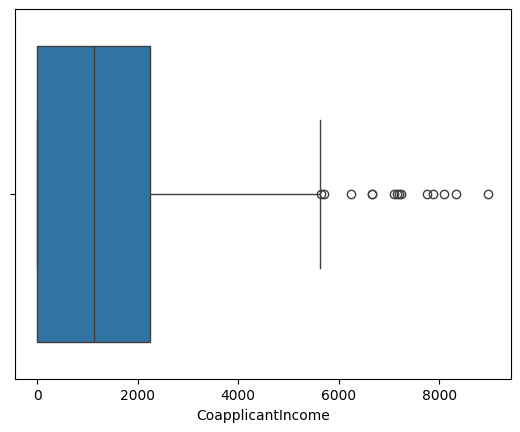

In [72]:
sns.boxplot(x = "CoapplicantIncome", data = new_dataset)
plt.show()

In [75]:
# Here we use the Z-Score Method for finding the outliers.
z_score = (dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean()) / dataset["CoapplicantIncome"].std()

In [78]:
dataset["z_score"] = z_score

In [79]:
dataset[dataset["z_score"] < 3] 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,z_score
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,NaN,Y,-0.554036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,-0.554036
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,-0.554036
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,-0.472019
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,-0.554036
